In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cell_df=pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')
cell_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_2028\2167489620.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_df=pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


C:\Users\USER\AppData\Local\Temp\ipykernel_2028\3495155509.py:5: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')


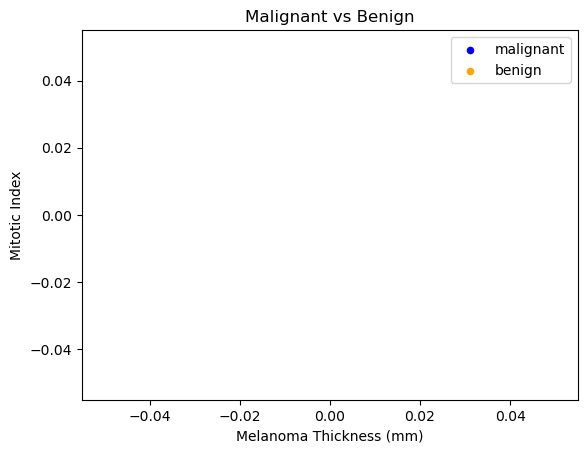

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual file path)
cell_df = pd.read_csv('C:/Users/USER/Desktop/Thesis Defence/ISIC/train-metadata.csv')

# Convert columns to numeric
cell_df["mel_thick_mm"] = pd.to_numeric(cell_df["mel_thick_mm"], errors="coerce")
cell_df["mel_mitotic_index"] = pd.to_numeric(cell_df["mel_mitotic_index"], errors="coerce")

# Drop rows with missing values
cell_df_clean = cell_df.dropna(subset=["mel_thick_mm", "mel_mitotic_index", "target"])

# Filter data
malignant = cell_df_clean[cell_df_clean["target"] == 1].head(50)
benign = cell_df_clean[cell_df_clean["target"] == 0].head(50)

# Plot
ax = malignant.plot(kind="scatter", x="mel_thick_mm", y="mel_mitotic_index", c="blue", label="malignant")
benign.plot(kind="scatter", x="mel_thick_mm", y="mel_mitotic_index", c="orange", label="benign", ax=ax)

# Label and show
plt.xlabel("Melanoma Thickness (mm)")
plt.ylabel("Mitotic Index")
plt.title("Malignant vs Benign")
plt.legend()
plt.show()


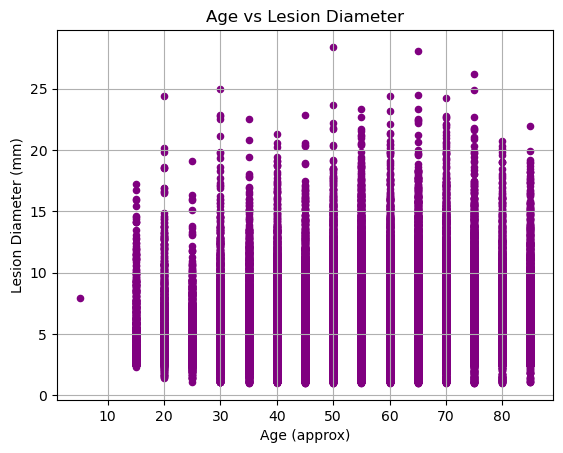

In [4]:
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns
plot_df = cell_df.dropna(subset=["age_approx", "clin_size_long_diam_mm"])

# Plot
plot_df.plot(
    kind="scatter",
    x="age_approx",
    y="clin_size_long_diam_mm",
    color="purple",
    title="Age vs Lesion Diameter"
)
plt.xlabel("Age (approx)")
plt.ylabel("Lesion Diameter (mm)")
plt.grid(True)
plt.show()


In [5]:
cell_df.dtypes

isic_id                          object
target                            int64
patient_id                       object
age_approx                      float64
sex                              object
anatom_site_general              object
clin_size_long_diam_mm          float64
image_type                       object
tbp_tile_type                    object
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64


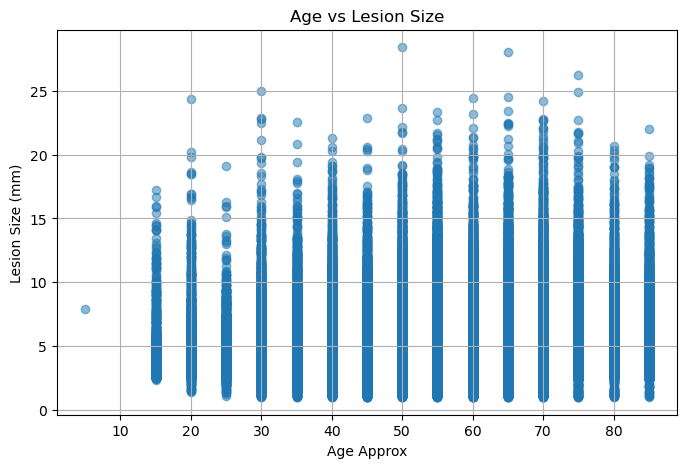

In [6]:
import matplotlib.pyplot as plt

# Age vs Lesion Size
plt.figure(figsize=(8,5))
plt.scatter(cell_df["age_approx"], cell_df["clin_size_long_diam_mm"], alpha=0.5)
plt.xlabel("Age Approx")
plt.ylabel("Lesion Size (mm)")
plt.title("Age vs Lesion Size")
plt.grid(True)
plt.show()


In [7]:
print(cell_df.columns)


Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

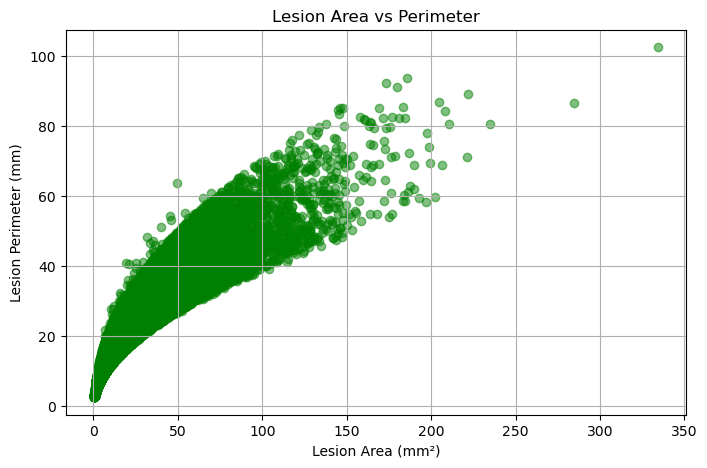

In [8]:
# tbp_lv_areaMM2 vs tbp_lv_perimeterMM
plt.figure(figsize=(8,5))
plt.scatter(cell_df["tbp_lv_areaMM2"], cell_df["tbp_lv_perimeterMM"], alpha=0.5, color='green')
plt.xlabel("Lesion Area (mm²)")
plt.ylabel("Lesion Perimeter (mm)")
plt.title("Lesion Area vs Perimeter")
plt.grid(True)
plt.show()


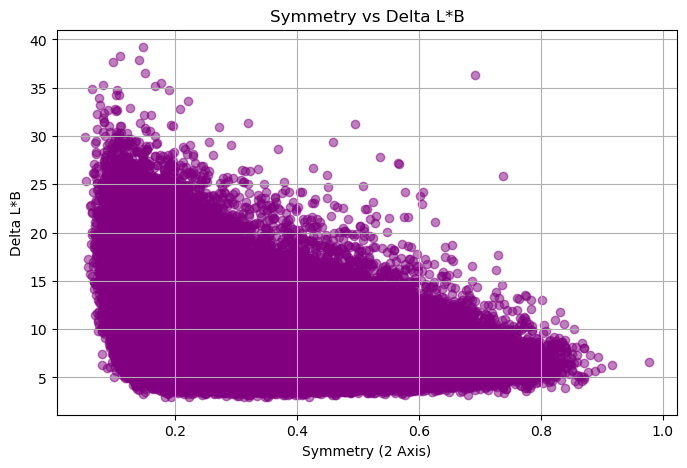

In [9]:
# tbp_lv_symm_2axis vs tbp_lv_deltaLB
plt.figure(figsize=(8,5))
plt.scatter(cell_df["tbp_lv_symm_2axis"], cell_df["tbp_lv_deltaLB"], alpha=0.5, color='purple')
plt.xlabel("Symmetry (2 Axis)")
plt.ylabel("Delta L*B")
plt.title("Symmetry vs Delta L*B")
plt.grid(True)
plt.show()


In [10]:
# তোমার dataset অনুযায়ী ফিচার নির্বাচন
feature_df = cell_df[[
    'age_approx',
    'clin_size_long_diam_mm',
    'tbp_lv_areaMM2',
    'tbp_lv_perimeterMM',
    'tbp_lv_deltaLB',
    'tbp_lv_symm_2axis',
    'tbp_lv_color_std_mean',
    'tbp_lv_norm_border',
    'tbp_lv_norm_color',
    'tbp_lv_eccentricity'
]]

# Numpy array তে রূপান্তর
X = np.asarray(feature_df)
print(X[0:5])


[[60.          3.04        3.15256146  9.30700349  8.36056574  0.59047619
   0.          7.09135959  0.          0.90130177]
 [60.          1.1         0.9194971   3.354148    6.839008    0.2857143
   0.          2.116402    0.          0.639885  ]
 [60.          3.4         3.265153    8.886309    9.092376    0.3619048
   0.          4.798335    0.          0.932147  ]
 [65.          3.22        6.07993995  9.51449919  4.78341293  0.20958084
   0.5145203   1.97587444  1.77170459  0.65445838]
 [55.          2.73        2.101708    6.467562    9.148495    0.3134328
   0.          3.658854    0.          0.9464478 ]]


In [11]:
print(cell_df.columns.tolist())


['isic_id', 'target', 'patient_id', 'age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']


In [12]:
# 'target' কলামকে int টাইপে কনভার্ট করা (যদি না হয় আগে থেকেই)
cell_df["target"] = cell_df["target"].astype(int)

# টার্গেট লেবেলকে numpy array তে রূপান্তর
y = np.asarray(cell_df["target"])

# প্রথম ৫টা মান দেখে নেওয়া
print(y[0:5])


[0 0 0 0 0]


In [13]:
print(np.unique(y, return_counts=True))


(array([0, 1]), array([400666,    393], dtype=int64))


In [14]:

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=4)

print("Train set :", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)

Train set : (320847, 10) (320847,)
Test set : (80212, 10) (80212,)


In [17]:
from sklearn import svm

clf=svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [18]:
from sklearn.impute import SimpleImputer
from sklearn import svm

In [19]:
imputer = SimpleImputer(strategy='median')  # 'mean' or 'most_frequent' optional
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [20]:
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

SVC()

In [21]:
yhat = clf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[80131     0]
 [   81     0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80131
           1       0.00      0.00      0.00        81

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
yhat=clf.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [24]:
from sklearn.impute import SimpleImputer

# Missing value গুলা mean দিয়ে ভর্তি করো
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# এরপর classifier train করো
clf = svm.SVC(kernel="rbf")
clf.fit(X_train_imputed, y_train)


SVC()

In [25]:

from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
yhat = clf.predict(X_test)


In [28]:
print(np.unique(y_test))


[0 1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80131
           1       0.00      0.00      0.00        81

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212

Confusion matrix, without normalization
[[80131     0]
 [   81     0]]


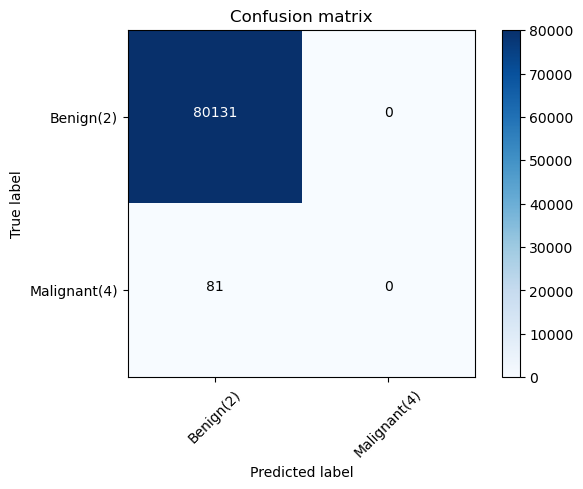

In [29]:
# Confusion matrix ও classification report
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'], normalize=False, title='Confusion matrix')
plt.show()


In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80131
           1       0.00      0.00      0.00        81

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212

Confusion matrix, without normalization
[[80131     0]
 [   81     0]]


In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average="weighted")

0.9984855191151629

In [32]:

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=1)

0.0

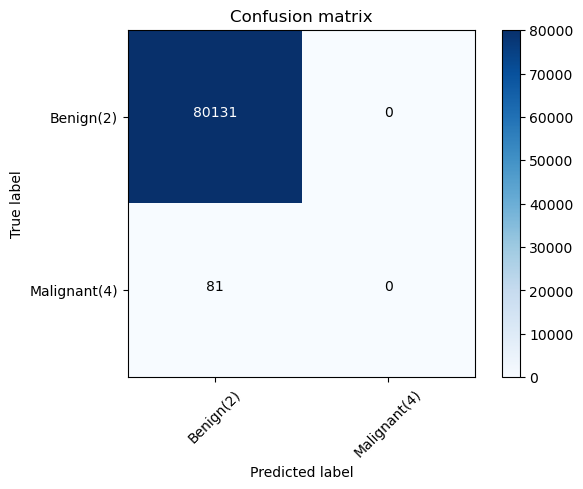

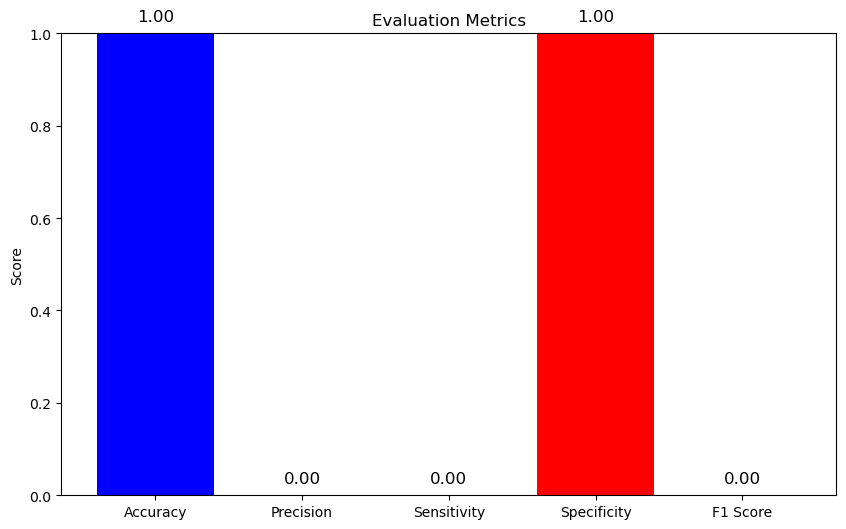

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
tn, fp, fn, tp = cnf_matrix.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
sensitivity = recall = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensitivity = Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

# Metrics for the plot
metrics = [accuracy, precision, sensitivity, specificity, f1_score]
metric_names = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

plt.show()


In [ ]:
!pip install numpy scikit-learn
